In [10]:
import time

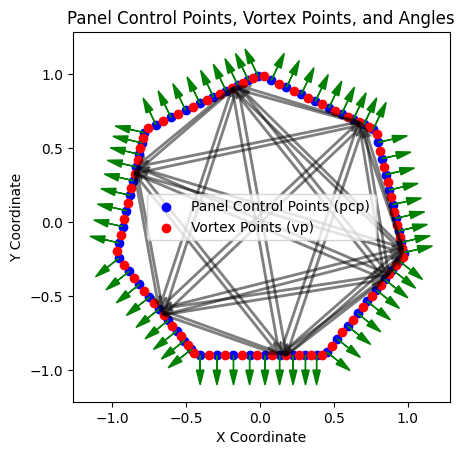

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def plot_panel_data(panels):
    # Calculate necessary points and angles
    nop = panels.shape[0]  # Number of Panels
    XYZ2 = panels  # Coordinates of end point of panel
    XYZ1 = np.roll(panels, 1, axis=0)  # Coordinates of the next end point of panel
    diff = XYZ1 - XYZ2

    # Control points at 3/4 of panel.
    pcp = XYZ2 + diff * 0.75
    # Vortex point at 1/4 of panel.
    vp = XYZ2 + diff * 0.25

    # Angle to the normal of the panel
    pb = np.arctan2(diff[:, 1], diff[:, 0]) + np.pi / 2

    # Create a plot
    fig, ax = plt.subplots()
    ax.scatter(pcp[:, 0], pcp[:, 1], color='blue', label='Panel Control Points (pcp)')
    ax.scatter(vp[:, 0], vp[:, 1], color='red', label='Vortex Points (vp)')

    # Plotting arrows for the angles (pb)
    for i in range(nop):
        ax.arrow(pcp[i, 0], pcp[i, 1], 0.1 * np.cos(pb[i]), 0.1 * np.sin(pb[i]), head_width=0.05, head_length=0.1, fc='green', ec='green')
    
    pcp_diff = pcp[:, np.newaxis, :] - vp[np.newaxis, :, :]

    # Plotting the pcp_diff vectors
    for i in range(0,len(pcp),10):
        for j in range(0,len(vp),10):
            start_point = vp[j]
            end_point = start_point + pcp_diff[i, j]
            ax.quiver(start_point[0], start_point[1], pcp_diff[i, j, 0], pcp_diff[i, j, 1], angles='xy', scale_units='xy', scale=1, alpha=0.5)


    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.legend()
    ax.set_title('Panel Control Points, Vortex Points, and Angles')
    ax.set_aspect('equal', adjustable='box')
    plt.show()

panels = np.load('panels_alpha.npy')
# Example usage with panels
# Replace `panels` with your actual panels array
plot_panel_data(panels)


In [13]:
panels = np.load('panels_alpha.npy')

# Calculates coefficient matrix.
nop = panels.shape[0]  # Number of Panels
# print(f"number of panels = {nop} ")
XYZ2 = panels  # Coordinates of end point of panel
XYZ1 = np.roll(panels, 1, axis=0)  # Coordinates of the next end point of panel
# print(f"{XYZ2=}, {XYZ1=}")
diff = XYZ1 - XYZ2
# print(f"{diff=}")

# Controlpoints point at 3/4 of panel. #pcp  = 0.5*( XYZ1 + XYZ2 )[:,:2]
pcp = XYZ2 + diff * 0.75
# Vortex point at 1/4 of panel.
vp = XYZ2 + diff * 0.25

#pb is the angle to the normal of the panel
pb = np.arctan2(diff[:, 1], diff[:, 0]) + np.pi / 2

# print(f"{pcp=},{vp=},{pb=}")

# Calculate K matrix
pcp_diff = pcp[:, np.newaxis, :] - vp[np.newaxis, :, :]
pcp_sq_dist = np.sum(pcp_diff ** 2, axis=-1)

#sin and cos of normal to the panels
cos_pb = np.cos(pb)
sin_pb = np.sin(pb)
K = (1 / (2 * np.pi)) * (
    pcp_diff[..., 1] * cos_pb[:, np.newaxis]
    - pcp_diff[..., 0] * sin_pb[:, np.newaxis]
) / pcp_sq_dist
print(K.shape)
# Inverse  of coefficient matrix: (Needed for solution of panel method eqn.)
K_inv = np.linalg.inv(K)
# t1 = time.perf_counter() - t 
# print(f"time taken to inverse is {t1}")

(63, 63)
